# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [38]:
import pandas as pd
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

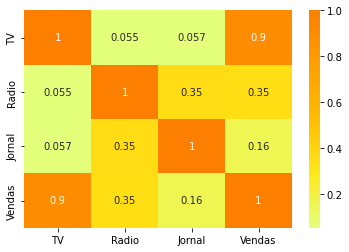

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
#sns.pairplot(df)
#plt.show()
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [40]:
X = df.iloc[:,0:3]
y = df.iloc[:,3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criando modelos
LinearModel = LinearRegression()
ForestModel = RandomForestRegressor()

#Treinando modelos
LinearModel.fit(X_train, y_train)
ForestModel.fit(X_train, y_train)

#realizando previsões
pred1 = LinearModel.predict(X_test)
pred2 = ForestModel.predict(X_test)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [42]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error

Linear_r2 = metrics.r2_score(y_test, pred1)
linearMSQ = mean_squared_error(y_test, pred1)

Forest_r2 = metrics.r2_score(y_test, pred2)
ForestMSQ = mean_squared_error(y_test, pred2)

print("Precisão 1 do modelo Linear: ",Linear_r2)
print("Precisão 2 do modelo Linear: ",linearMSQ)

print("Precisão 1 do modelo Forest: ",Forest_r2)
print("Precisão 2 do modelo Forest: ",ForestMSQ)

Precisão 1 do modelo Linear:  0.9071151423684273
Precisão 2 do modelo Linear:  2.370659971225657
Precisão 1 do modelo Forest:  0.9621662757272322
Precisão 2 do modelo Forest:  0.9656137500000015


#### Visualização Gráfica das Previsões

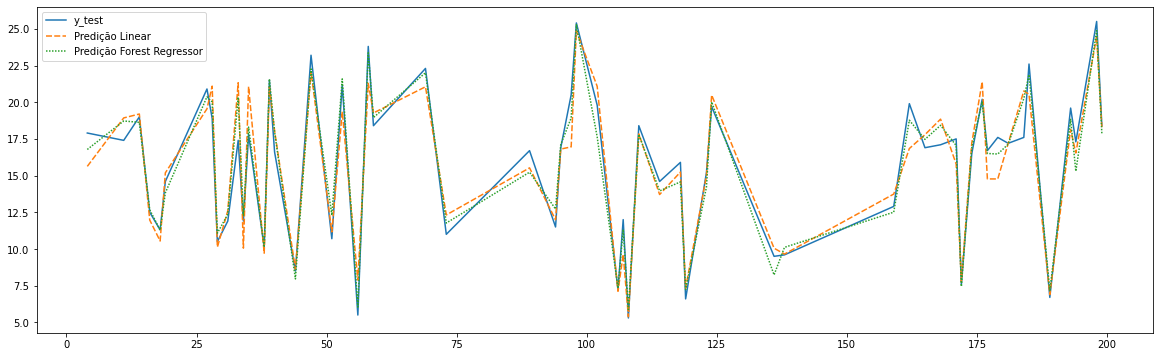

In [48]:
df_auxiliar = pd.DataFrame()
df_auxiliar['y_test'] = y_test
df_auxiliar['Predição Linear'] = pred1
df_auxiliar['Predição Forest Regressor'] = pred2

plt.figure(figsize=(20,6))
sns.lineplot(data=df_auxiliar)
plt.show()

#### Como fazer uma nova previsão?